In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy import stats
import numpy as np

importation des fonctions utilisées

C:\Users\user\AppData\Local\Temp\ipykernel_16460\775948522.py:5: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  lic_comm = pd.read_csv(chemin_acces_lic_comm, encoding="utf-8", sep=";")


Defaulting to user installation because normal site-packages is not writeable
   num_dep                  nom_dep  nombre_menages  nb_habitants   NBUC19  \
0       01                      Ain          265876        632800   425987   
1       02                    Aisne          223756        513384   351009   
2       03                   Allier          159016        326409   233659   
3       04  Alpes-de-Haute-Provence           74172        154335   109862   
4       05             Hautes-Alpes           64721        134710    95836   
..     ...                      ...             ...           ...      ...   
93      93        Seine-Saint-Denis          601846       1600460  1029621   
94      94             Val-de-Marne          565806       1363385   911777   
95      95               Val-d'Oise          466919       1256247   807878   
96     972               Martinique          149609        324588   227771   
97     974               La Réunion          323129        86810


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


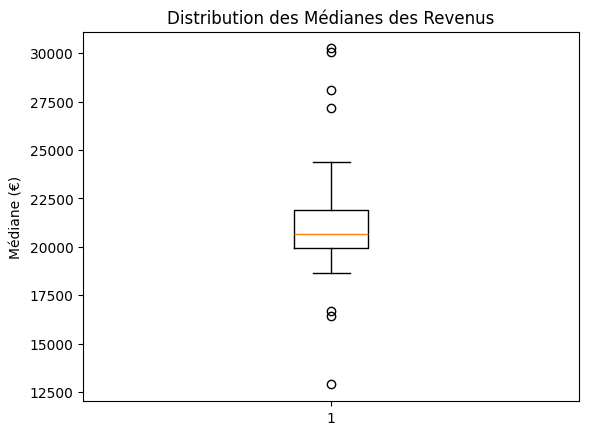

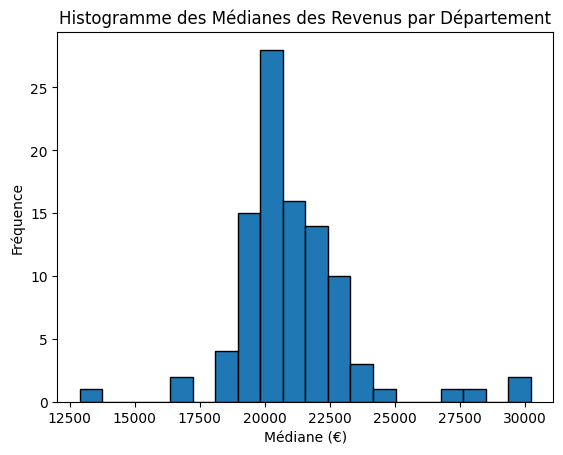

Le département avec le plus d'inégalités est : La Réunion
Corrélation entre revenu et inégalités: 0.12983021873638817
    num_dep                  nom_dep                      Région
0         1                      Ain        Auvergne-Rhône-Alpes
1         2                    Aisne             Hauts-de-France
2         3                   Allier        Auvergne-Rhône-Alpes
3         4  Alpes-de-Haute-Provence  Provence-Alpes-Côte d'Azur
4         5             Hautes-Alpes  Provence-Alpes-Côte d'Azur
..      ...                      ...                         ...
96      971               Guadeloupe                  Guadeloupe
97      972               Martinique                  Martinique
98      973                   Guyane                      Guyane
99      974               La Réunion                  La Réunion
100     976                  Mayotte                     Mayotte

[101 rows x 3 columns]


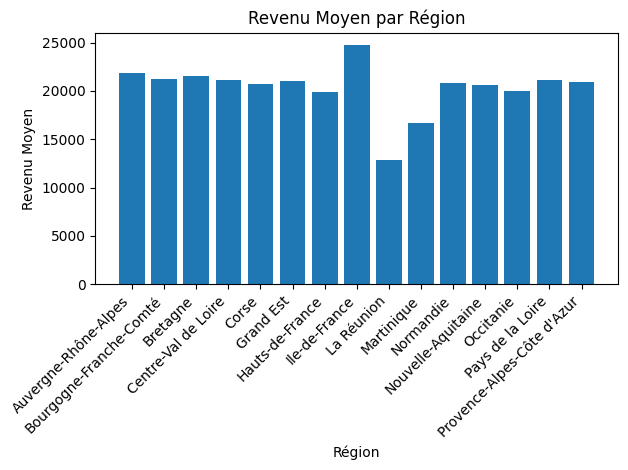

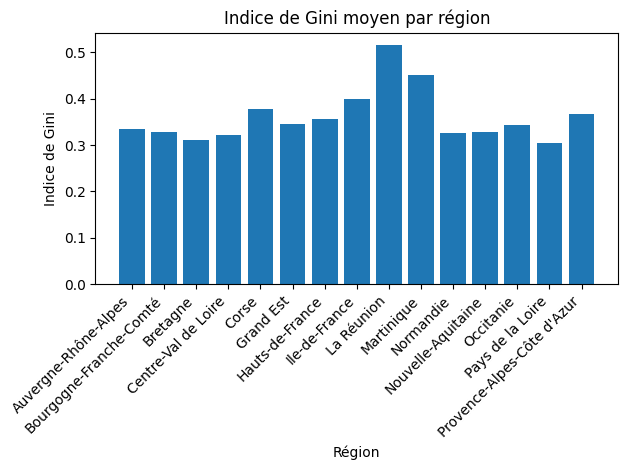

In [33]:
%run fonctions_modelisation.ipynb

# 1 Régression à l'échelle Régionale

Dans un premier temps, Effectuons une analyse de régression (linéaire, polynomiale, logistique, etc.) pour évaluer l'influence du revenu sur le nombre de licenciés ou d'autres indicateurs de pratique sportive.

In [27]:
revenu_par_region

,Région,mediane
0,Auvergne-Rhône-Alpes,21821.666667
1,Bourgogne-Franche-Comté,21227.500000
2,Bretagne,21560.000000
3,Centre-Val de Loire,21141.666667
4,Corse,20765.000000
5,Grand Est,20981.000000
6,Hauts-de-France,19882.000000
7,Ile-de-France,24776.250000
10,Normandie,20808.000000
11,Nouvelle-Aquitaine,20655.000000


In [3]:
revenu_par_region

,Région,mediane
0,Auvergne-Rhône-Alpes,21821.666667
1,Bourgogne-Franche-Comté,21227.500000
2,Bretagne,21560.000000
3,Centre-Val de Loire,21141.666667
4,Corse,20765.000000
5,Grand Est,20981.000000
6,Hauts-de-France,19882.000000
7,Ile-de-France,24776.250000
8,La Réunion,12890.000000
9,Martinique,16690.000000


Puisque la base des nombres de licenciés par fédérations ne spécifie pas les valeurs pour la Réunion et la Martinique comme la base revenu. Je rajoute le revenu pour les territoire d'outre mer

In [4]:
# Valeur médiane de La Réunion et Martinique
valeur_mediane_reunion_martinique = revenu_par_region[revenu_par_region['Région'].isin(['La Réunion', 'Martinique'])]['mediane'].mean()

# Ajouter la région "Drom" avec la même valeur médiane
revenu_par_region.loc[len(revenu_par_region)] = ['DROM', valeur_mediane_reunion_martinique]
#supprimer La Réunion et Martinique
revenu_par_region=revenu_par_region[~revenu_par_region['Région'].isin(['La Réunion', 'Martinique'])]

# Afficher le nouveau tableau
print(revenu_par_region)

                        Région       mediane
0         Auvergne-Rhône-Alpes  21821.666667
1      Bourgogne-Franche-Comté  21227.500000
2                     Bretagne  21560.000000
3          Centre-Val de Loire  21141.666667
4                        Corse  20765.000000
5                    Grand Est  20981.000000
6              Hauts-de-France  19882.000000
7                Ile-de-France  24776.250000
10                   Normandie  20808.000000
11          Nouvelle-Aquitaine  20655.000000
12                   Occitanie  20022.307692
13            Pays de la Loire  21106.000000
14  Provence-Alpes-Côte d'Azur  20921.666667
15                        DROM  14790.000000


#nettoyage de la base région pour la régression

In [34]:
#Répartition des sports pr régions
sport_region= base_sport_par_region(base)
sport_region

,Région,Fédération,nb_licencies
0,Auvergne-Rhône-Alpes,F Nationale du Sport en Milieu Rural,3875
1,Auvergne-Rhône-Alpes,F Nautique de Pêche Sportive en Apnée,10
3,Auvergne-Rhône-Alpes,F Sportive des ASPTT,14304
5,Auvergne-Rhône-Alpes,F des Arts Énergétiques et Martiaux Chinois,2181
6,Auvergne-Rhône-Alpes,FF Aéronautique,4466
...,...,...,...
1349,Île-de-France,FF du Sport Boules,1414
1350,Île-de-France,FF du Sport Travailliste,4893
1352,Île-de-France,FF du Sport d'Entreprise,6027
1354,Île-de-France,Union Nationale Sportive Léo Lagrange,1606


In [43]:
top5=sports_parmi_les_5_sports_plus_pratiques(sport_region)
top5

['FF de Voile',
 "FF d'Éducation Physique et de Gymnastique Volontaire",
 "FF d'Équitation",
 'FF de Judo, Jujitsu, Kendo et DA',
 'FF de Rugby',
 'FF de Pétanque et Jeu Provençal',
 'FF de Golf',
 'FF de Handball',
 "FF d'Athlétisme",
 'FF de Football',
 'FF de Natation',
 'FF de Tir',
 'FF de Basketball',
 'FF de Tennis']

In [45]:
sport_region_regress=Base_classification_top5(sport_region)
sport_region_regress['nb_licencies'] =sport_region_regress[top5].sum(axis=1)
sport_region_regress=sport_region_regress[['Région','nb_licencies']]
sport_region_regress


,Région,nb_licencies
0,Auvergne-Rhône-Alpes,998091.0
1,Bourgogne-Franche-Comté,322033.0
2,Bretagne,443231.0
3,Centre-Val de Loire,325914.0
4,Corse,39070.0
5,DROM,158333.0
6,Grand Est,640725.0
7,Hauts-de-France,642921.0
8,Normandie,408563.0
9,Nouvelle-Aquitaine,813647.0


In [67]:
#jointure avec les revenus médians pour obtenir la base à utiliser pour la regression.
sport_region__revenu_regress=pd.merge(sport_region_regress,revenu_par_region,on='Région')
sport_region__revenu_regress

,Région,nb_licencies,mediane
0,Auvergne-Rhône-Alpes,998091.0,21821.666667
1,Bourgogne-Franche-Comté,322033.0,21227.500000
2,Bretagne,443231.0,21560.000000
3,Centre-Val de Loire,325914.0,21141.666667
4,Corse,39070.0,20765.000000
5,Grand Est,640725.0,20981.000000
6,Hauts-de-France,642921.0,19882.000000
7,Normandie,408563.0,20808.000000
8,Nouvelle-Aquitaine,813647.0,20655.000000
9,Occitanie,758816.0,20022.307692


# Evalution de la linéarité

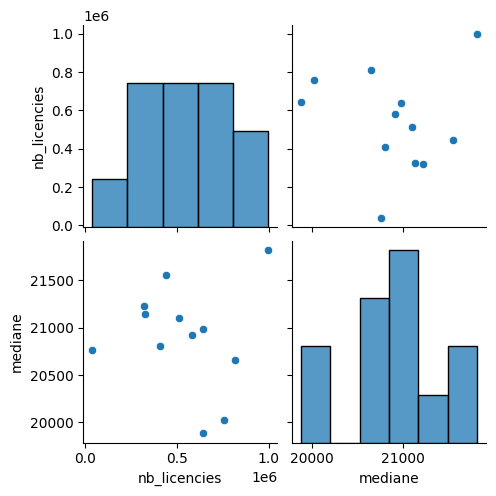

In [68]:
######comparaison entre nb_liencies et mediane
sns.pairplot(sport_region__revenu_regress)

la relation entre le nombre de licenciés et le revenu médian n'est pas linéaire. les scatter_plot ne décrivent pas une fonction puissance. les données sont asymétriques.
Il faut trouver un moyen de le linéariser.

# Recherche de linéarité en vu d'une régression linéaire

#transformations logistiques

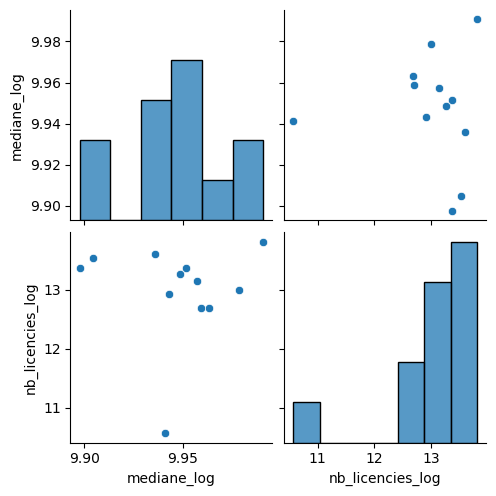

In [69]:
sport_region__revenu_regress['mediane_log'] = np.log(sport_region__revenu_regress['mediane'] + 1)  # Ajout de 1 pour éviter log(0)
sport_region__revenu_regress['nb_licencies_log'] = np.log(sport_region__revenu_regress['nb_licencies'] + 1)

sns.pairplot(sport_region__revenu_regress[['mediane_log','nb_licencies_log']])

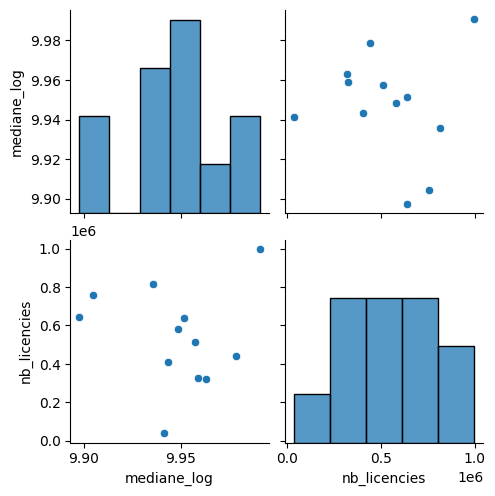

In [70]:
#log sur les revenus médians
sns.pairplot(sport_region__revenu_regress[['mediane_log','nb_licencies']])

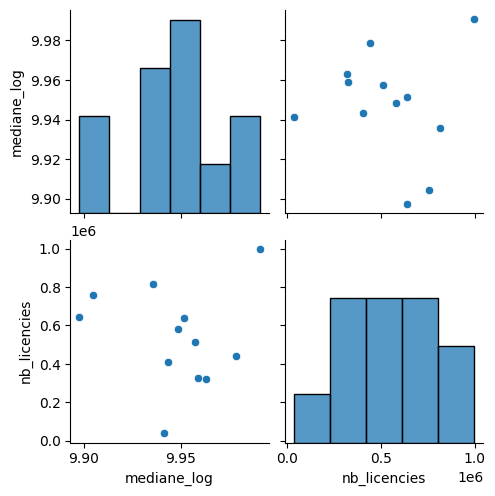

In [71]:
#log sur les nb_licenciés
sns.pairplot(sport_region__revenu_regress[['mediane_log','nb_licencies']])

la transformation logarithmique ne change rien.

# transformations Box_cox

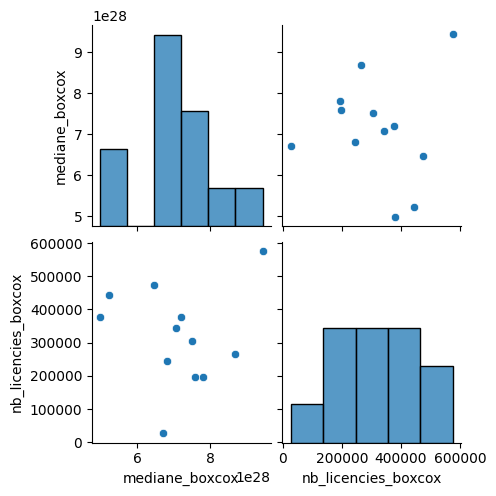

In [72]:

sport_region__revenu_regress['mediane_boxcox'], fitted_lambda_revenu = stats.boxcox(sport_region__revenu_regress['mediane'])
sport_region__revenu_regress['nb_licencies_boxcox'], fitted_lambda_licencies = stats.boxcox(sport_region__revenu_regress['nb_licencies'])
sns.pairplot(sport_region__revenu_regress[['mediane_boxcox','nb_licencies_boxcox']])

La tranformation de Cox ne résouds pas le problème de linéarité.

# IL est important de tester la normalité de la variable indépendante

Statistiques=0.989, p=0.999
Échantillon semble Gaussien (ne rejette pas H0)


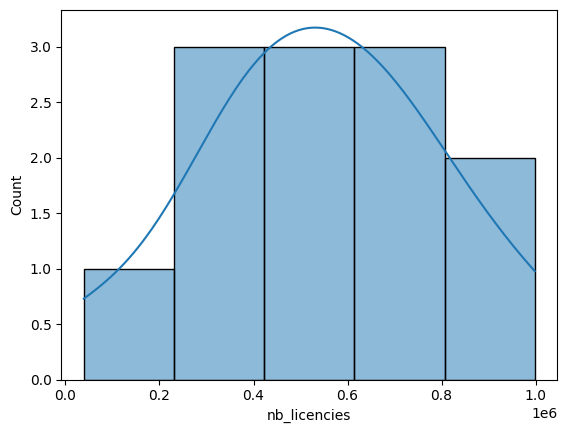

In [50]:
# Histogramme de la distribution
sns.histplot(sport_region__revenu_regress['nb_licencies'], kde=True)

# Ou test de normalité, par exemple avec scipy
from scipy.stats import shapiro
stat, p = shapiro(sport_region__revenu_regress['nb_licencies'])
print('Statistiques=%.3f, p=%.3f' % (stat, p))
# Interprétation
alpha = 0.05
if p > alpha:
    print('Échantillon semble Gaussien (ne rejette pas H0)')
else:
    print('Échantillon ne semble pas Gaussien (rejette H0)')